# Titanic survived Project

###### Project Description

**Dataset Link-**

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [221]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**About Data:**
    
**PassengerId:** A unique number for each passenger. It's like an ID card number for passengers.

**Survived:** It tells us if a passenger lived (1) or didn't make it (0) during the Titanic disaster. This is what we want to predict.

**Pclass:** It shows the type of ticket a passenger had: 1st class (fancy), 2nd class (not as fancy), or 3rd class (basic).

**Name:** The names of the passengers. We might not use this directly, but we can learn things like Mr. or Mrs. from it.

**Sex:** Whether the passenger was a man or a woman.

**Age:** How old the passenger was. This can help us understand if being young or old mattered for survival.

**SibSp:** The number of brothers, sisters, or spouses a passenger had on board.

**Parch:** The number of parents or children a passenger had on board.

**Ticket:** The ticket number, not that important by itself.

**Fare:** How much money the passenger paid for the ticket. This might tell us if rich or poor passengers had different survival chances.

**Cabin:** The cabin number where the passenger stayed. Not very crucial, but it could tell us where they were on the ship.

**Embarked:** The place where the passenger got on the ship (Cherbourg, Queenstown, or Southampton). It could give us clues about where they're from.

In [222]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


###### Exploratory Data Analysis

In [223]:
#Checking the dimension of the dataset
df.shape

(891, 12)

In [224]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [225]:
# Checking the types of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

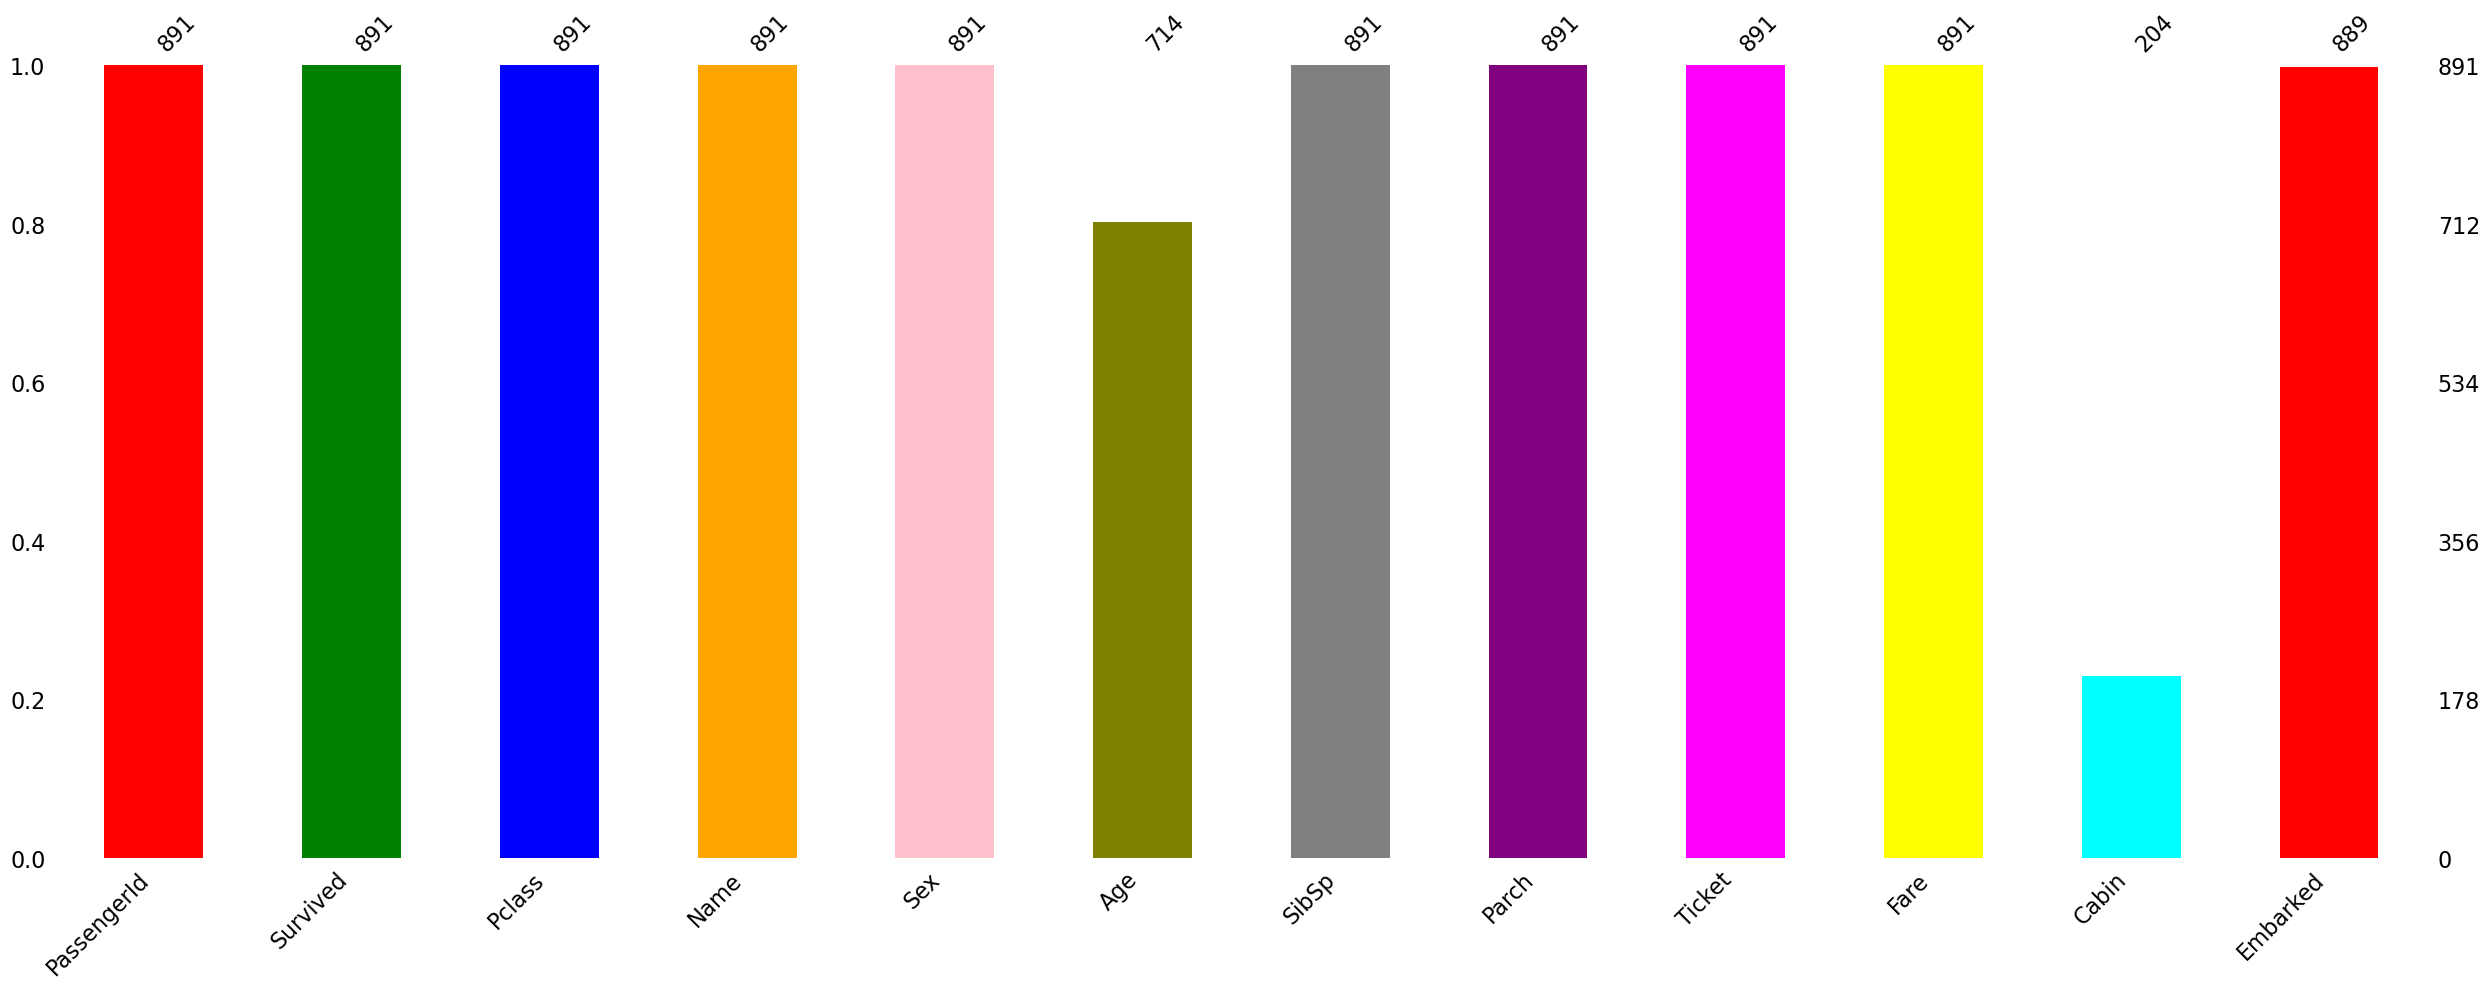

In [227]:
msno.bar(df, color=['red', 'green', 'blue', 'orange', 'pink', 'olive', 'grey', 'purple','magenta', 'yellow', 'cyan'])

In [228]:
# checking the null values

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [229]:
# checking the null values count in each column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


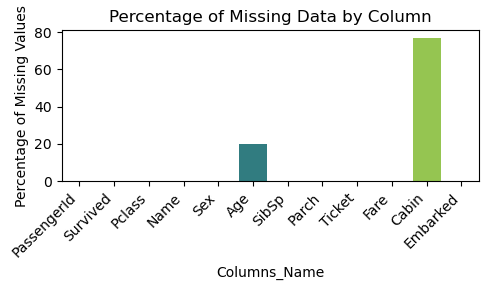

In [230]:
missing_percentage = (df.isnull().mean() * 100).round(2)
print(missing_percentage)

# Create a bar plot to visualize missing data
plt.figure(figsize=(5, 3))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="viridis")
ax.set(xlabel='Columns_Name', ylabel='Percentage of Missing Values')
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right',rotation=45)
ax.set_title("Percentage of Missing Data by Column") 
plt.show()

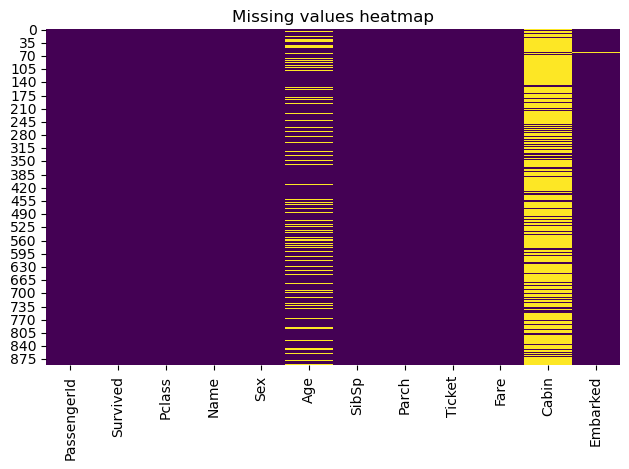

In [231]:
# # Lets visualize it using heatmap
sns.heatmap(df.isnull(), cmap="viridis", cbar = False).set_title("Missing values heatmap")
plt.show()

<Axes: >

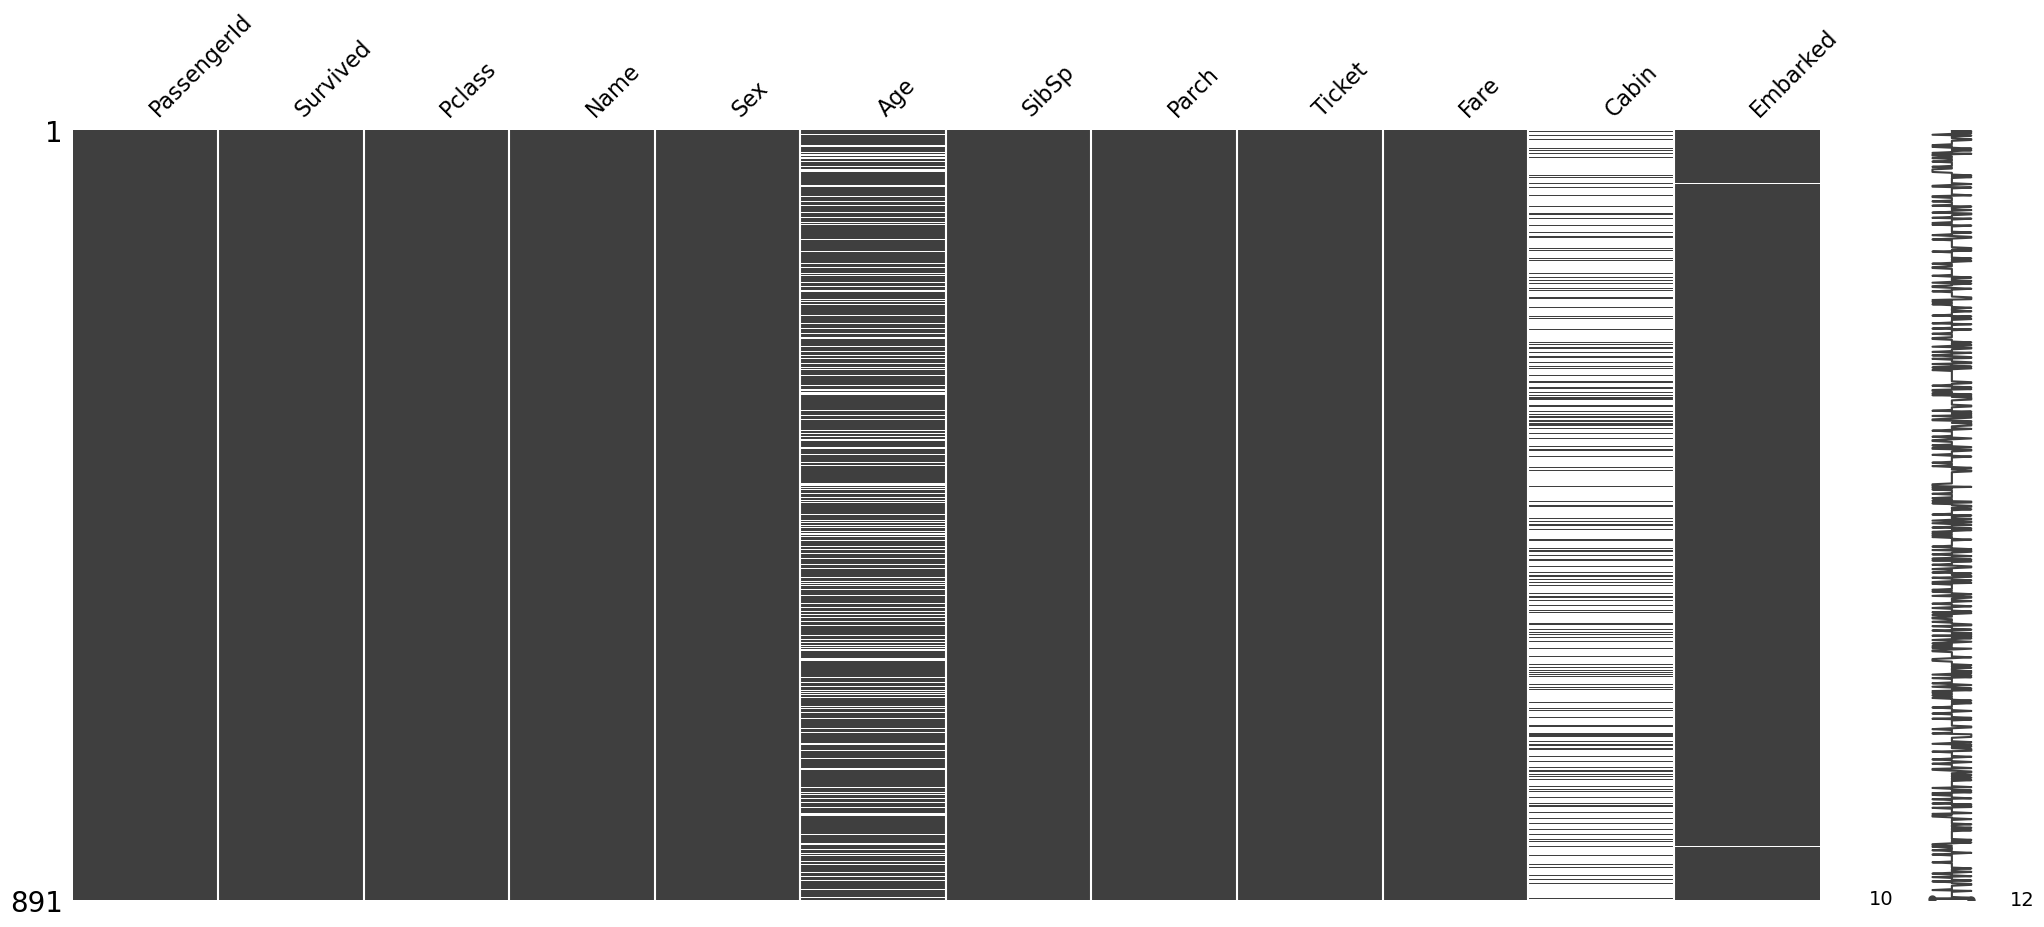

In [232]:
msno.matrix(df,)

**Observation**

Based on the data provided and visualisation, it's evident that the Cabin column has the highest number of missing values, while the Age column has a moderate amount compared to Cabin, and the Embarked column has just 2 missing values. 

Given that Cabin has the most missing data, accounting for 77% of the total missing values, it poses a significant limitation for model predictions. Hence, We will drop it to avoid introducing unnecessary complexity and bias into our models. 

In [233]:
#Checks for specified values in DataFrame

df.isin([' ','NA','NaN', '_']).sum().any()

False

**We are getting rid of some columns because:**

Cabin: Most of the data in this column is missing (77% of it).

PassengerId: It's basically the same as the index number, so we do not need both.

Name: This column is not necessary for our purposes directly, but we can learn things like Mr. or Mrs. from it.

In [234]:
df.drop(columns=['Cabin','PassengerId','Name'], inplace=True)

###### Addressing missing information in the 'Age' and 'Embarked' columns.

In [235]:
#Substitute missing ages with the average age of passengers
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [236]:
#Replace empty 'Embarked' values with the port most passengers embarked from.
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [237]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**After eliminating certain columns and addressing missing data within the dataset, we now possess a more refined and comprehensible dataset.**

In [238]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [239]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

**Based on the counts of unique values, we can conclude that:**

**Numerical Columns :** Age, Fare

**Categorical Columns :** Survived, Pclass, Sex, SibSp, Parch, Embarked

**Mixed(categorical and alphanumeric) column :** Ticket

In [240]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,Sex,Ticket,Embarked
count,891,891,891
unique,2,681,3
top,male,347082,S
freq,577,7,646


In [241]:
# Stattistical summary of numerical columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**From above data we can conclude that:**

* Count each numerical columns are same (i.e:891).

**Mean and Standard devation :**

* The values in the "Survived" variable are spread out from the mean value (0.38). As std=0.49, This suggests that there is       some variation in survival rates among passengers.

* The passenger class numbers are a bit different from the average (2.31), which means there are different classes of passengers   on the ship

*  The ages of passengers vary a lot from the average age of 29.70 years, showing that there are people of many different ages      on the ship.
*  The number of siblings or spouses people have on the ship varies a bit from the average of 0.52, showing that passengers have    different amounts of family members with them.

* The number of parents or children passengers have with them is a bit different from the average of 0.38, which means some       passengers have more while others have fewer parents or children with them.

* The values in the "Fare" variable have a relatively large spread from the mean value (32.20). This indicates that there is a     wide range of fares paid by the passengers, with some passengers paying significantly higher fares than others.

**Mean and Median :**

* Mean of survived column indicates that on average, approximately 38.38% of passenger survived.However, the median suggests       that half of the passengers did not survive (0).
* The mean passenger class is approximately 2.31, indicating a moderate class. The median passenger class is 3, suggesting that   most passengers were in class 3.
* The mean and median ages are approximately the same, around 29.70 years, indicating a roughly symmetrical age distribution.
* The mean suggests that, on average, passengers had about 0.52 siblings/spouses aboard. However, the median shows that most       passengers did not have siblings/spouses aboard (0).
* The mean indicates that, on average, passengers had about 0.38 parents/children aboard. However, the median shows that most     passengers did not have parents/children aboard (0).
* The mean fare is higher than the median, indicating that some passengers paid significantly higher fares, pulling the mean       upwards. The median fare of 14.4542 represents the middle fare paid by passengers.

**75% TO Max :**

* Some passengers are much older (like 80 years old), which is unusual. 

* Some passengers have a lot more siblings or spouses with them (up to 8), which is not common.
* Some passengers have many parents or children with them (up to 6), which is also not common.
* Some passengers paid extremely high fares compared to most others.
* These unusual values can be considered outliers because they are very different from what most passengers experienced.

In [242]:

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


S    646
C    168
Q     77
Name: Embarked, d

### Univariant Analysis: 

###### Categorical Column

0    549
1    342
Name: Survived, dtype: int64


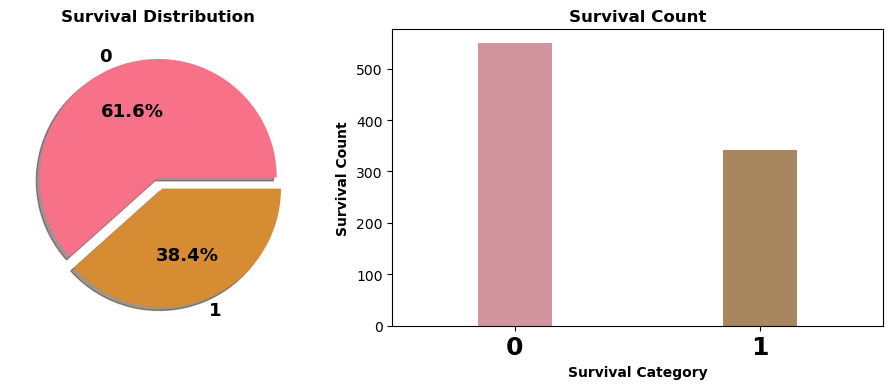

In [243]:
survived_counts = df['Survived'].value_counts() #Counting Survival Data
print(survived_counts)
sns.set_palette("husl", 9) #Setting Color Palette

f, ax = plt.subplots(1, 2, figsize=(10, 4))# Creating Subplots
#Pie Chart for Survival Distribution
survived_counts.plot(kind='pie', explode=[0, 0.1], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0], shadow=True)
#Title and Formatting for Pie Chart
ax[0].set_title('Survival Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylabel('')
# Bar Chart for Survival Count
sns.countplot(x='Survived', data=df, ax=ax[1],saturation=0.45, width=0.3)
ax[1].set_title('Survival Count', fontsize=12, fontweight='bold')
ax[1].set_xlabel("Survival Category", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Survival Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()


* The visualization reveals that the 'Survived' column contains two distinct values: 0, representing those who did not survive,   and 1, representing survivors. 
* A majority, over 61%, did not survive.
* There are no missing values in this column.

3    491
1    216
2    184
Name: Pclass, dtype: int64


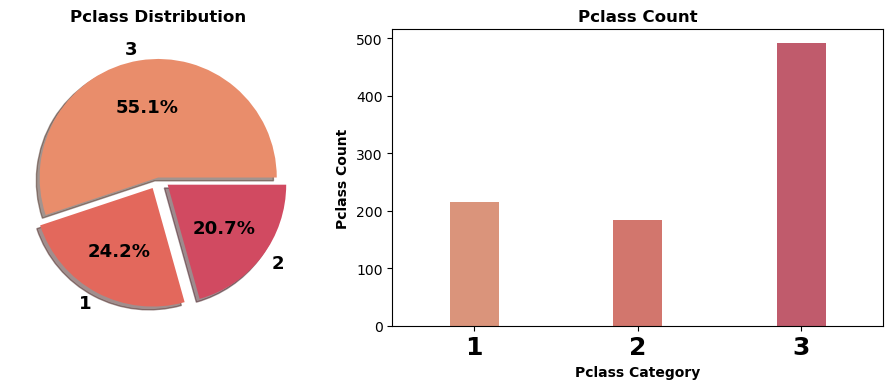

In [244]:
Pclass_counts = df['Pclass'].value_counts() #Counting Survival Data
print(Pclass_counts) 
sns.set_palette('flare') 
f, ax = plt.subplots(1, 2, figsize=(10, 4))# Creating Subplots
#Pie Chart for Survival Distribution
Pclass_counts.plot(kind='pie', explode=[0, 0.1, 0.1], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0], shadow=True)
#Title and Formatting for Pie Chart
ax[0].set_title('Pclass Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylabel('')
# Bar Chart for Survival Count
sns.countplot(x='Pclass', data=df, ax=ax[1],saturation=0.75, width=0.3 )
ax[1].set_title('Pclass Count', fontsize=12, fontweight='bold')
ax[1].set_xlabel("Pclass Category", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Pclass Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* In the dataset, there are three types of passenger classes: PClass 1, PClass 2, and PClass 3.

* PClass 3 had the largest passenger population, accounting for 55.1% of the total passengers, making it the predominant class.

* PClass 1 had a higher number of passengers at 24.2% compared to PClass 2, which had 20.7% of the total passengers.

male      577
female    314
Name: Sex, dtype: int64


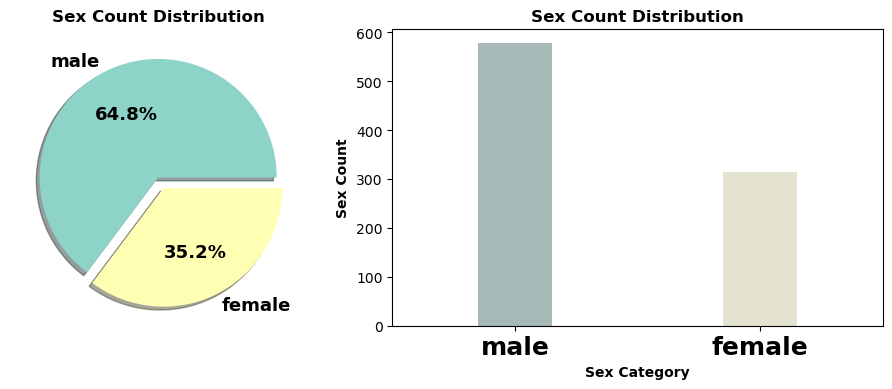

In [245]:
Sex_counts = df['Sex'].value_counts() #Counting Survival Data
print(Sex_counts) 
sns.set_palette('Set3') 
f, ax = plt.subplots(1, 2, figsize=(10, 4))# Creating Subplots
#Pie Chart for Survival Distribution
Sex_counts.plot(kind='pie', explode=[0, 0.1], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0], shadow=True)
#Title and Formatting for Pie Chart
ax[0].set_title('Sex Count Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylabel('')
# Bar Chart for Survival Count
sns.countplot(x='Sex', data=df, ax=ax[1],saturation=0.25, width=0.3 )
ax[1].set_title('Sex Count Distribution', fontsize=12, fontweight='bold')
ax[1].set_xlabel("Sex Category", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Sex Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* There exist two unique gender categories: 'male' and 'female'. 
* Males represent the dominant group, constituting 64% of the passenger population, while females constitute 35.2% of the         overall passengers.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


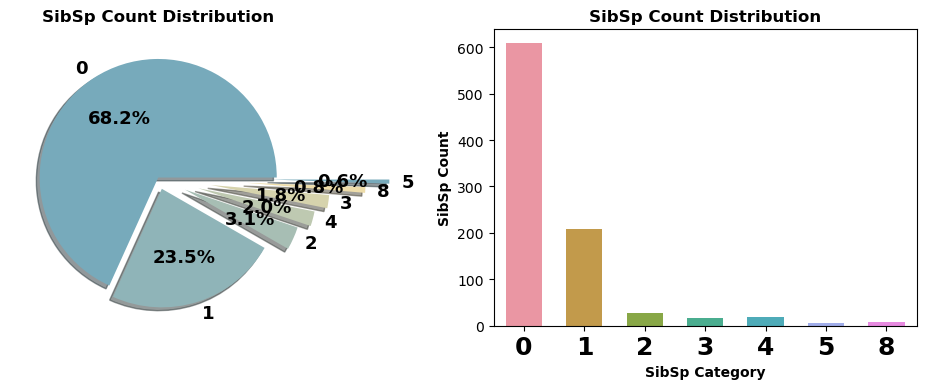

In [246]:
SibSp_counts = df['SibSp'].value_counts() #Counting Survival Data
print(SibSp_counts ) 
sns.set_palette("blend:#7AB,#EDA")  
f, ax = plt.subplots(1, 2, figsize=(10, 4))# Creating Subplots
#Pie Chart for Survival Distribution

SibSp_counts .plot(kind='pie', explode=[0, 0.1, 0.25, 0.35, 0.45, 0.75, 0.95], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0],shadow=True)
#Title and Formatting for Pie Chart
ax[0].set_title('SibSp Count Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylabel('')
# Bar Chart for Survival Count
sns.countplot(x='SibSp', data=df, ax=ax[1],saturation=0.75, width=0.6 )
ax[1].set_title('SibSp Count Distribution', fontsize=12, fontweight='bold')
ax[1].set_xlabel("SibSp Category", fontsize=10, fontweight='bold')
ax[1].set_ylabel("SibSp Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* Most passengers traveled alone, and there were more of them than any other group.
* The second-largest group included passengers with one sibling or spouse.
* The third-largest group consisted of passengers traveling with two siblings or spouses.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


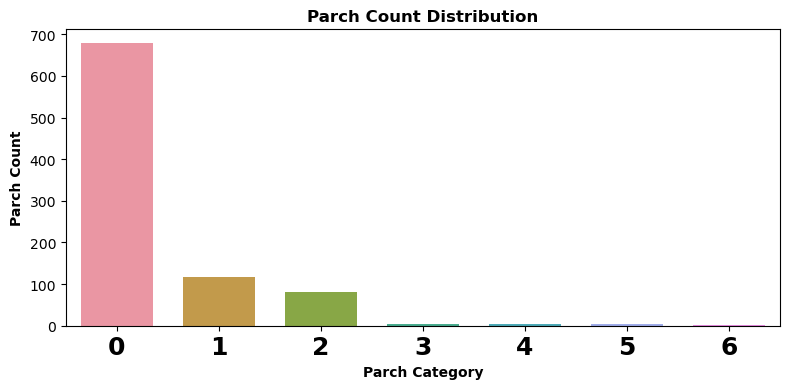

In [247]:
Parch_counts = df['Parch'].value_counts() #Counting Survival Data
print(Parch_counts ) 
f, ax = plt.subplots(figsize=(8,4))# Creating Subplots
# Bar Chart for Survival Count
sns.countplot(x='Parch', data=df,saturation=0.75, width=.7 )
ax.set_title('Parch Count Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel("Parch Category", fontsize=10, fontweight='bold')
ax.set_ylabel("Parch Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* Most passengers in this dataset traveled alone, without any family members.

* The second most common scenario was passengers traveling with just one parent or child.

* The third most common scenario was passengers traveling with two parents or children.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


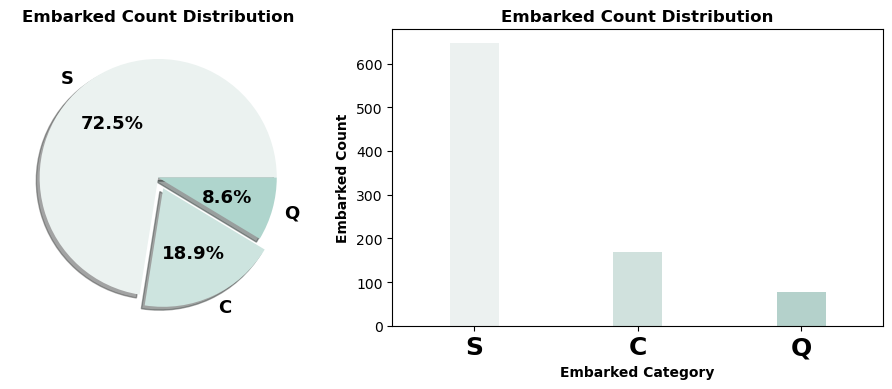

In [248]:
Embarked_counts = df['Embarked'].value_counts() #Counting Survival Data
print(Embarked_counts ) 
sns.set_palette("light:#5A9") 
f, ax = plt.subplots(1, 2, figsize=(10, 4))# Creating Subplots
#Pie Chart for Survival Distribution

Embarked_counts .plot(kind='pie', explode=[0, 0.1, 0], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0],shadow=True)
#Title and Formatting for Pie Chart
ax[0].set_title('Embarked Count Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylabel('')
# Bar Chart for Survival Count
sns.countplot(x='Embarked', data=df, ax=ax[1],saturation=0.75, width=0.3 )
ax[1].set_title('Embarked Count Distribution', fontsize=12, fontweight='bold')
ax[1].set_xlabel("Embarked Category", fontsize=10, fontweight='bold')
ax[1].set_ylabel("Embarked Count", fontsize=10, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The largest group of passengers started their journey from Southampton (S), followed by Cherbourg (C). Queenstown (Q) had the smallest number of passengers. This trend can be explained by the fact that Southampton was the ship's starting point.

###### Numerical column

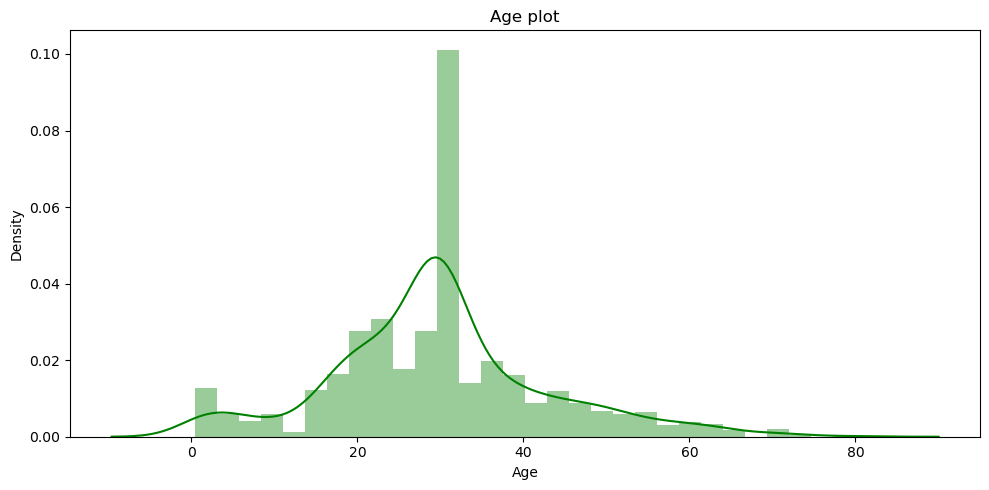

In [249]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], color='green')
plt.title("Age plot")
plt.show()

* When we look at the distribution of ages in a population, it roughly follows the shape of a normal distribution or a bell       curve With heavier tails.

* The heavier tails indicates that there are more individuals with ages that are much older or much younger than the average       age.  
* Thus, when we examine the distribution, we can conclude that it conforms to a normal pattern, and there are no outliers         present because all the entries are valid.

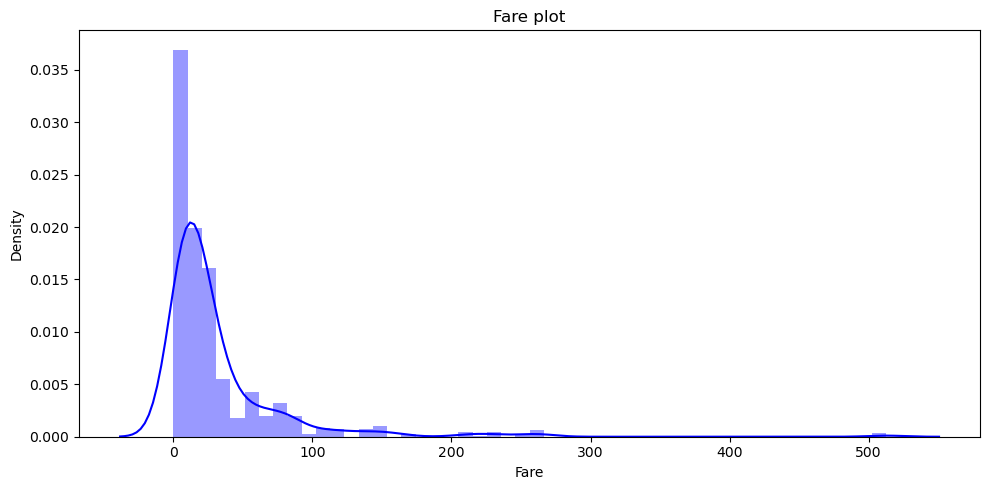

In [250]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Fare'], color='blue')
plt.title("Fare plot")
plt.show()

* The data is unevenly distributed with most values on one side i.e. highly positevly skewed. 
* The "Fare" column is holding the groups cost, not for individuals. Hence, we need to creae a new column as "Individual Fare".

##### Bivariant AnaLysis

In [251]:
#Visualizing Survival Rates by Gender and Passenger Class
(pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True, normalize='columns')* 100).round(2).style.background_gradient(cmap='summer_r')

In [252]:
# Calculate the total count of females and males
total_females = df[df['Sex'] == 'female'].shape[0]
total_males = df[df['Sex'] == 'male'].shape[0]

# Calculate the count of survivors among females and males
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]

# Calculate the percentage of female and male survival
percentage_female_survival = (female_survivors / total_females) * 100
percentage_male_survival = (male_survivors / total_males) * 100

print(f"Percentage of female survival: {percentage_female_survival:.2f}%")
print(f"Percentage of male survival: {percentage_male_survival:.2f}%")

Percentage of female survival: 74.20%
Percentage of male survival: 18.89%


**Gender Differences:**

* Among females, there is a significantly higher survival rate compared to males in all passenger classes.
* The survival rate for females is generally higher, with the highest survival rate among females in first class.

**Passenger Class Differences:**

* Survival rates generally decrease as the passenger class number increases. 
* First-class passengers have the highest survival rates, followed by second-class passengers, and third-class passengers have the lowest survival rates.

**We can see that:**

* For all females, the overall survival rate is approximately 74.11% (combining all passenger classes).
* For all males, the overall survival rate is approximately 18.79% (combining all passenger classes).

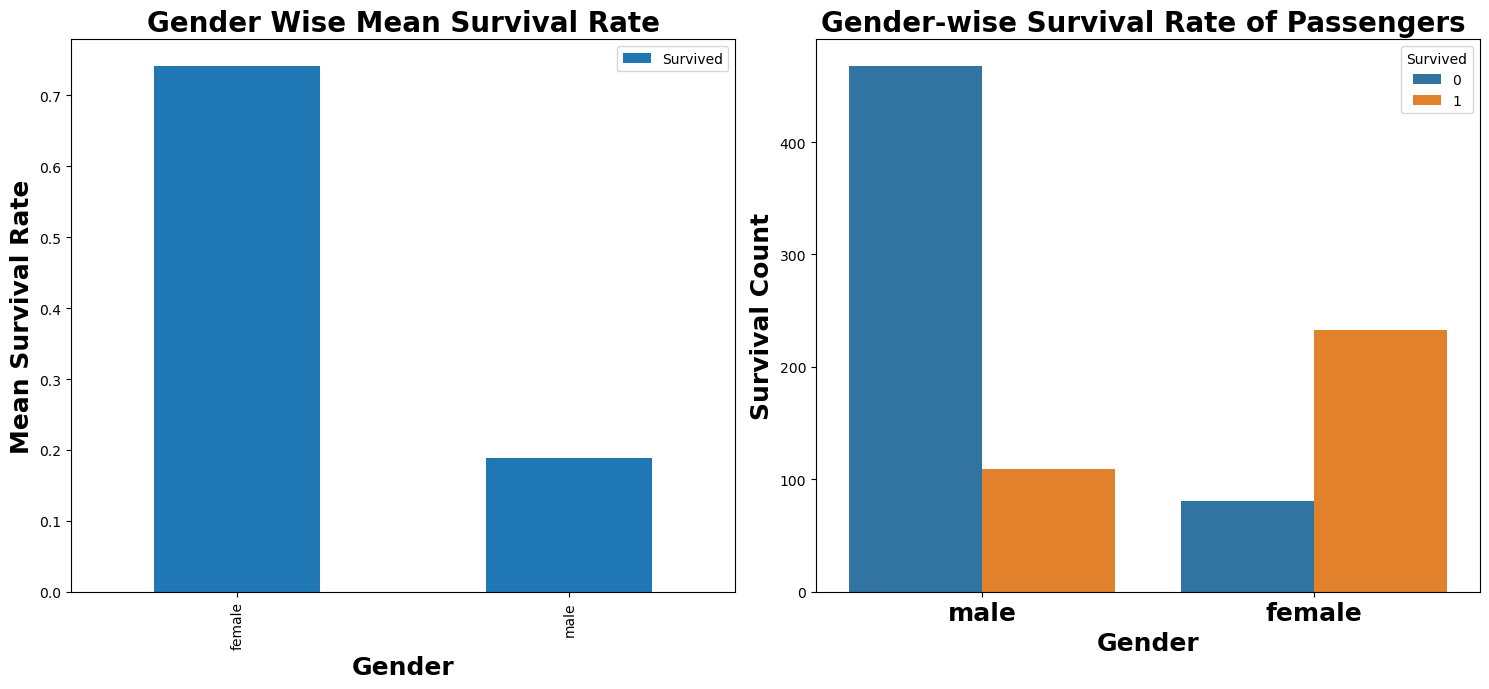

In [253]:
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(15,7))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
plt.xticks(fontsize=18,fontweight ='bold',rotation=0)
ax[0].set_title('Gender Wise Mean Survival Rate',fontsize=20,fontweight ='bold')

ax[0].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[0].set_ylabel("Mean Survival Rate", fontsize= 18, fontweight='bold')
sns.countplot(x='Sex', hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Gender-wise Survival Rate of Passengers ',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.tight_layout()
plt.show()

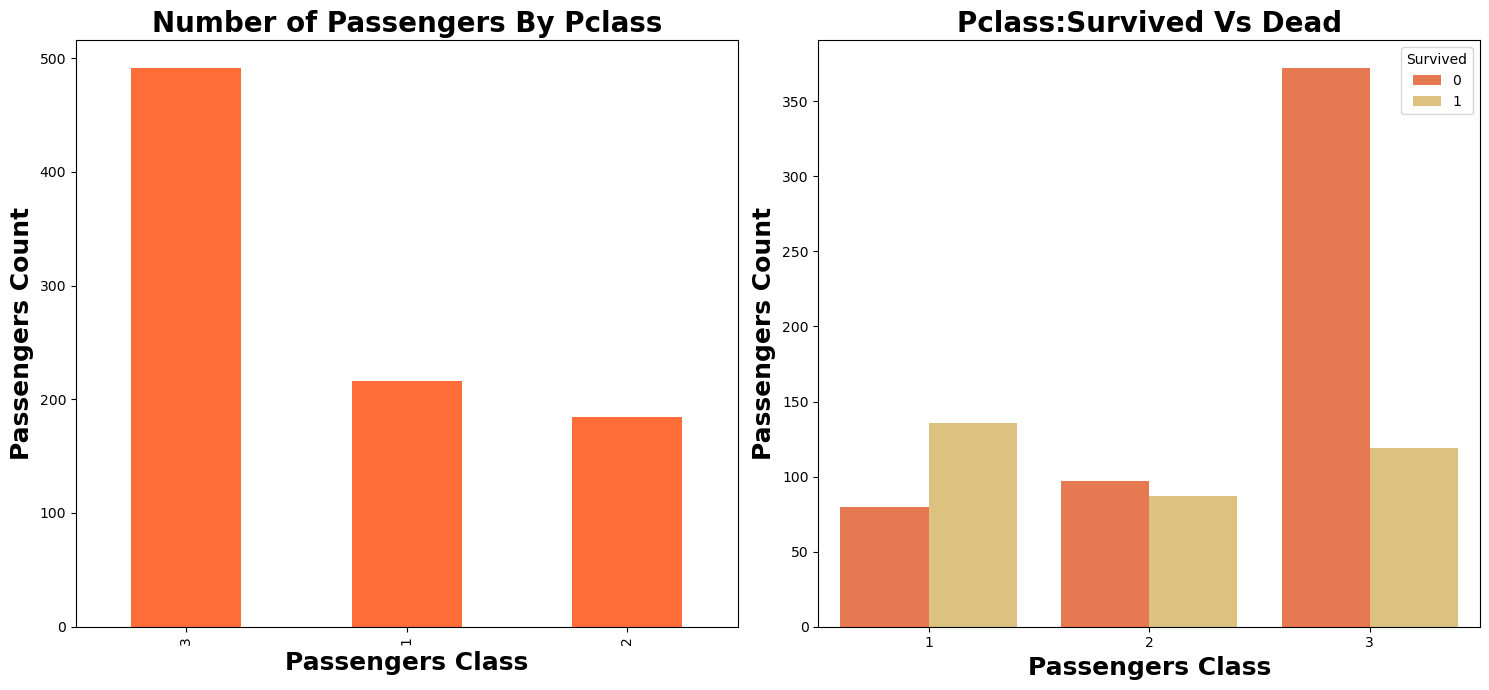

In [254]:
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.countplot(x='Pclass',hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived Vs Dead', fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
plt.show()

##### Multivariant analysis

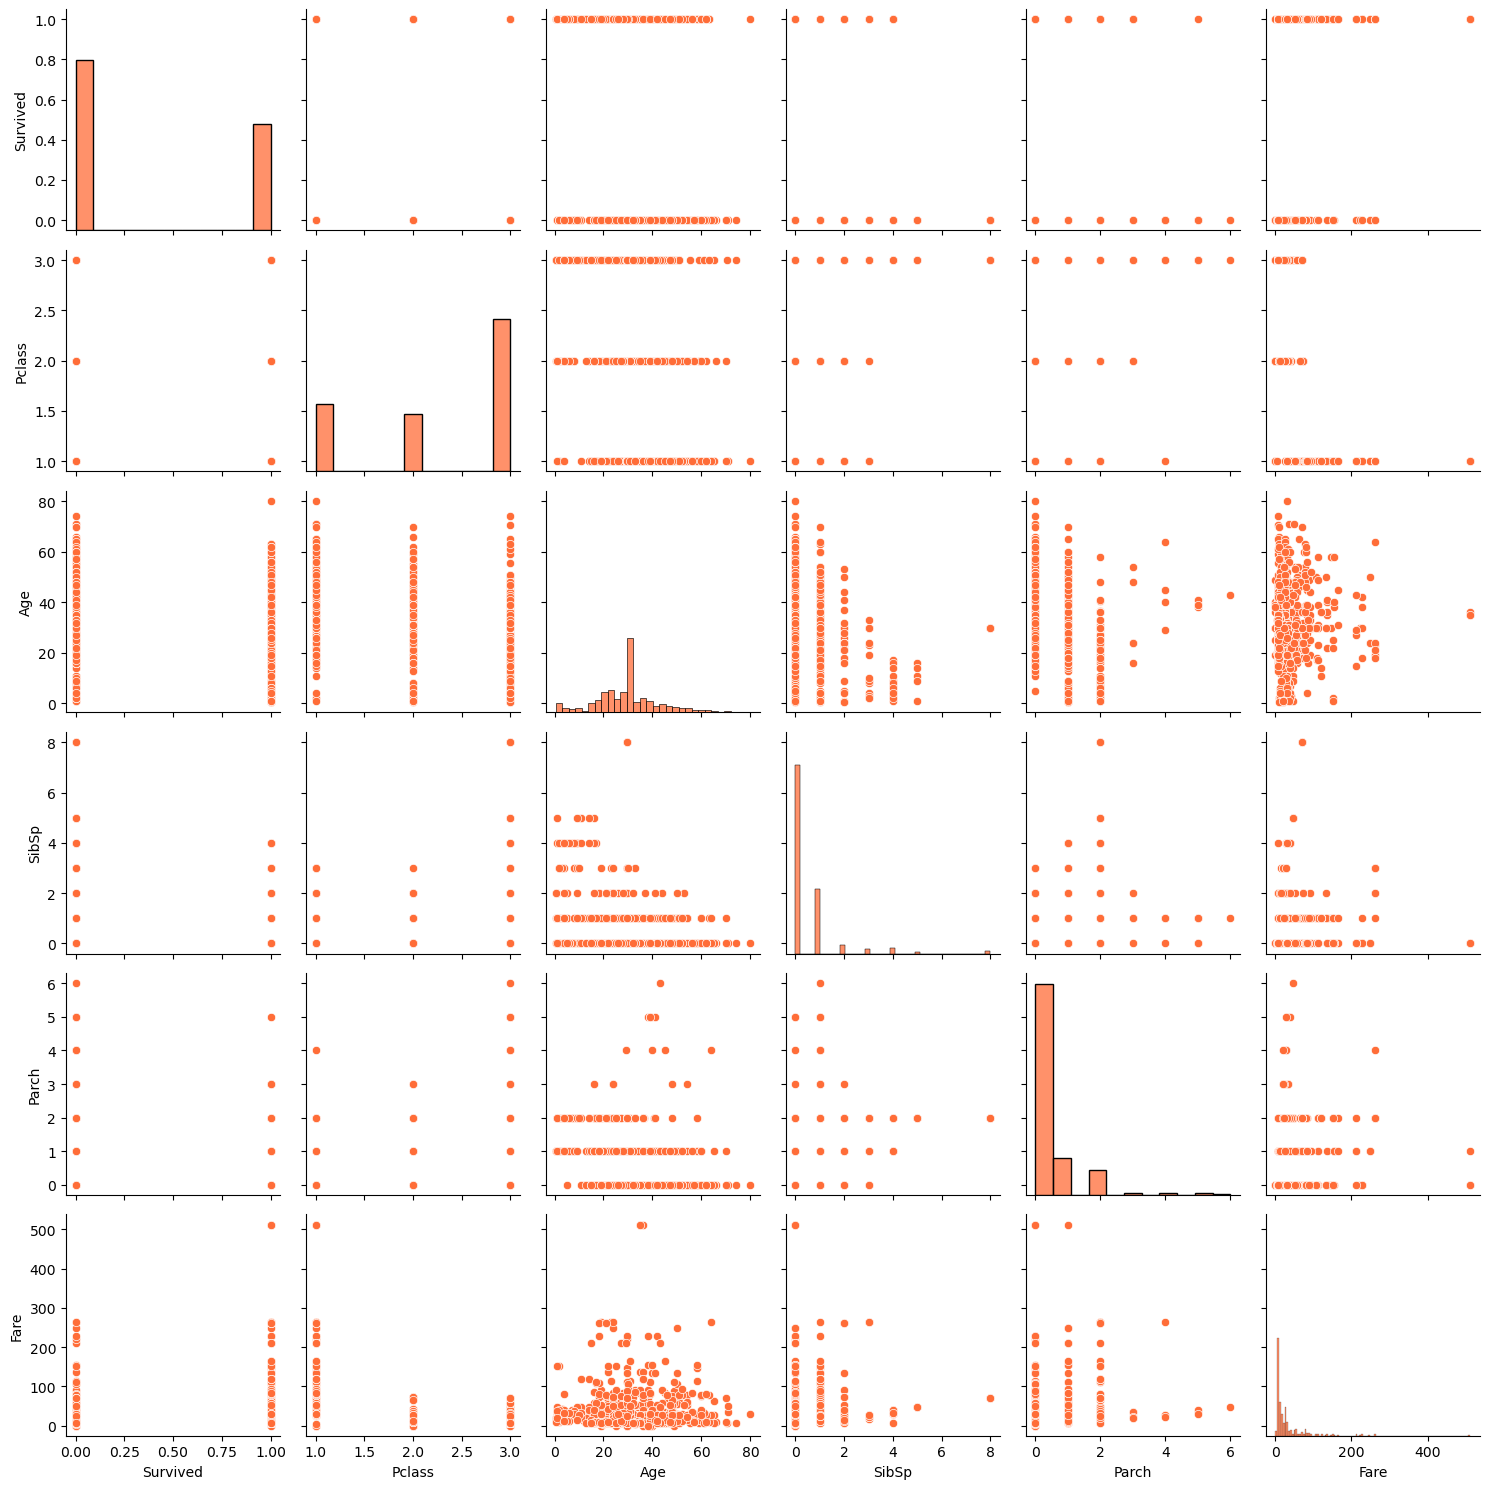

In [255]:
sns.pairplot(df)

In [256]:
#Creating a new column by the name of family which will be the sum of SibSp and Parch cols
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,2
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,2
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,female,35.000000,1,0,113803,53.1000,S,2
4,0,3,male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,1
887,1,1,female,19.000000,0,0,112053,30.0000,S,1
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S,4
889,1,1,male,26.000000,0,0,111369,30.0000,C,1


In [257]:
# Now we will enginer a new feature by the name of family type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num>1 and num <5:
        return "small"
    else:
        return "large"

In [258]:
df['family_type'] = df['family_size'].apply(transform_family_size)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,2,small
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,2,small
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,alone
3,1,1,female,35.000000,1,0,113803,53.1000,S,2,small
4,0,3,male,35.000000,0,0,373450,8.0500,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,1,alone
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,alone
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S,4,small
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,alone


In [259]:
#Dropping columns
df.drop(columns=['SibSp', 'Parch', 'family_size', 'Ticket'],inplace=True)

family_type,alone,large,small
Survived,,,
0,69.65,83.87,42.12
1,30.35,16.13,57.88


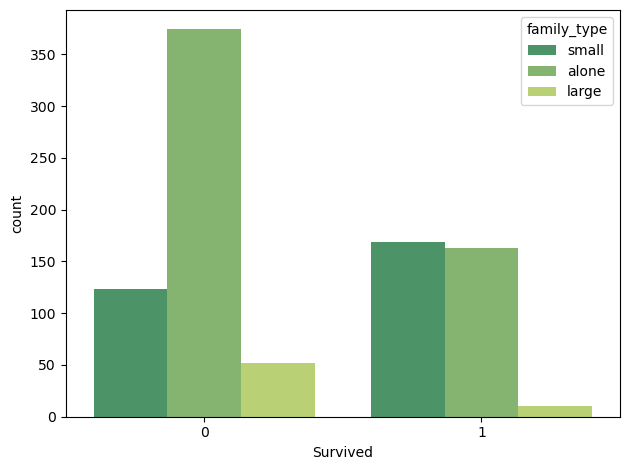

In [260]:
#survived by family type
sns.countplot(x='Survived', data=df, hue='family_type', palette='summer')
(pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100).round(2)

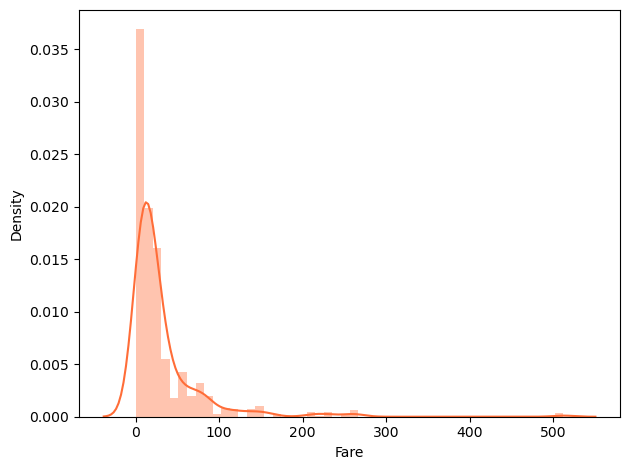

In [261]:
#Log transformation for uniform data distribution
sns.distplot(df['Fare'],kde=True)
plt.show()

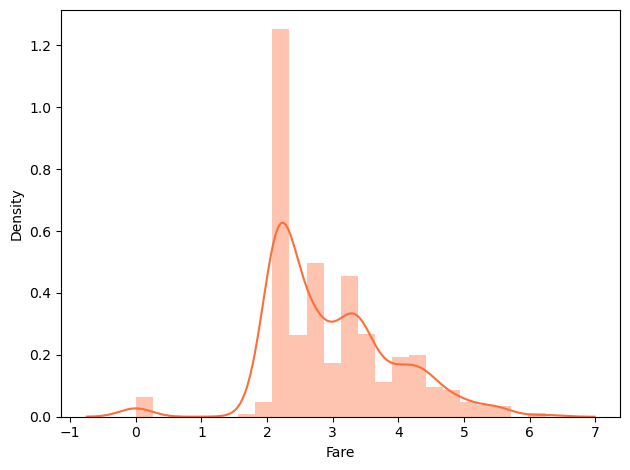

In [262]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'])
plt.show()

In [263]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked', 'family_type']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,0,3,1,22.0,2.110213,2,2
1,1,1,0,38.0,4.280593,0,2
2,1,3,0,26.0,2.188856,2,0
3,1,1,0,35.0,3.990834,2,2
4,0,3,1,35.0,2.202765,2,0


<Axes: >

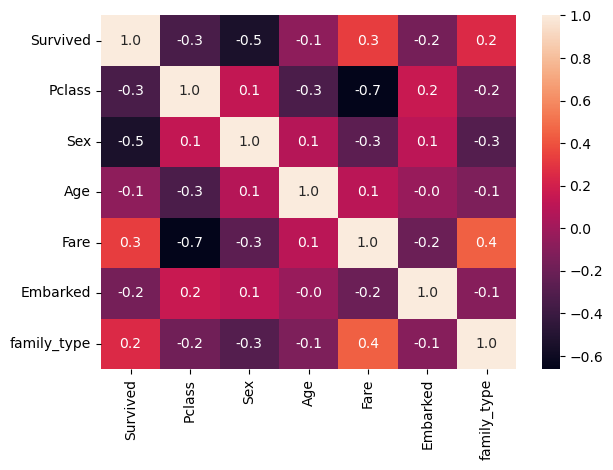

In [264]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".1f")

In [265]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [266]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [267]:
#data is looks imbalanced.Hence we have to apply the scaling technique.

###### Scaling data Using StandardScaler

In [268]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale =['Pclass','Age','Fare']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [269]:
scaled_df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
0,0,0.827377,1,-0.592481,-0.879741,2,2
1,1,-1.566107,0,0.638789,1.361220,0,2
2,1,0.827377,0,-0.284663,-0.798540,2,0
3,1,-1.566107,0,0.407926,1.062038,2,2
4,0,0.827377,1,0.407926,-0.784179,2,0
...,...,...,...,...,...,...,...
886,0,-0.369365,1,-0.207709,-0.333698,2,0
887,1,-1.566107,0,-0.823344,0.487082,2,0
888,0,0.827377,0,0.000000,0.242007,2,2
889,1,-1.566107,1,-0.284663,0.487082,0,0


In [270]:
X = scaled_df.drop('Survived', axis = 1)
y = scaled_df['Survived']

In [271]:
#Handling Imbalanced
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [273]:
#Importing Required Libraries
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       110
           1       0.80      0.76      0.78       110

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220

Cross-Validation Scores: [0.7150838  0.82022472 0.80337079 0.76966292 0.79213483]
Mean Cross-Validation Score: 0.7800954114619296


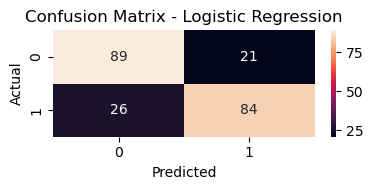

In [274]:
#Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8503719008264463


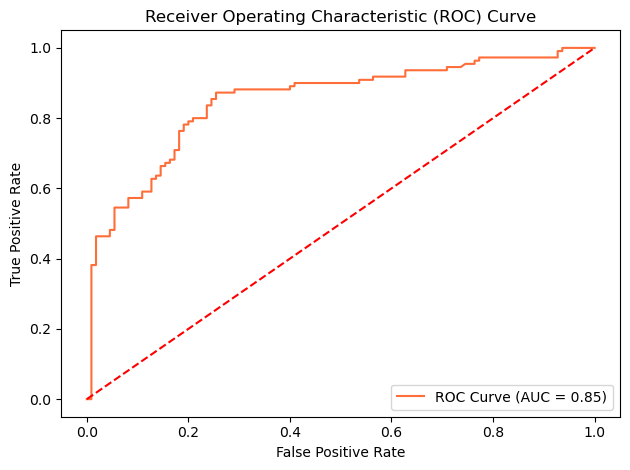

In [275]:
#ROC curve

y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.80      0.88      0.84       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Cross-Validation Scores: [0.82122905 0.80898876 0.82022472 0.78089888 0.85955056]
Mean Cross-Validation Score: 0.8181783943255289


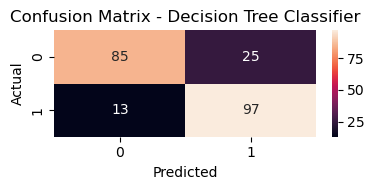

In [276]:
#Decision Tree Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.883099173553719


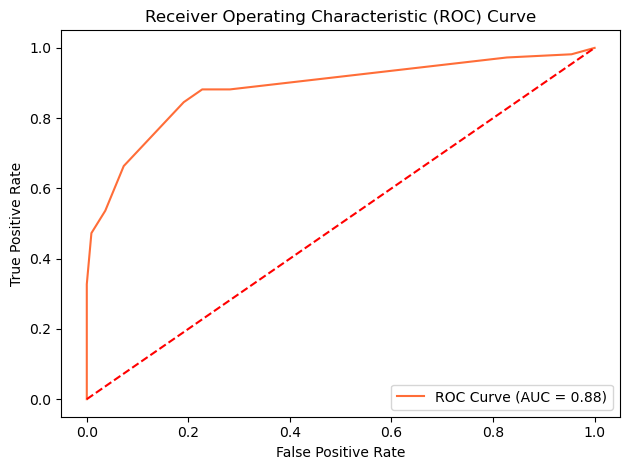

In [277]:
#ROC AUC Curve

y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       110
           1       0.84      0.75      0.79       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220

Cross-Validation Scores: [0.7877095  0.82022472 0.82022472 0.78651685 0.85393258]
Mean Cross-Validation Score: 0.8137216747222397


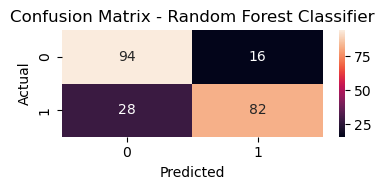

In [278]:
#Random Forest Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8870247933884298


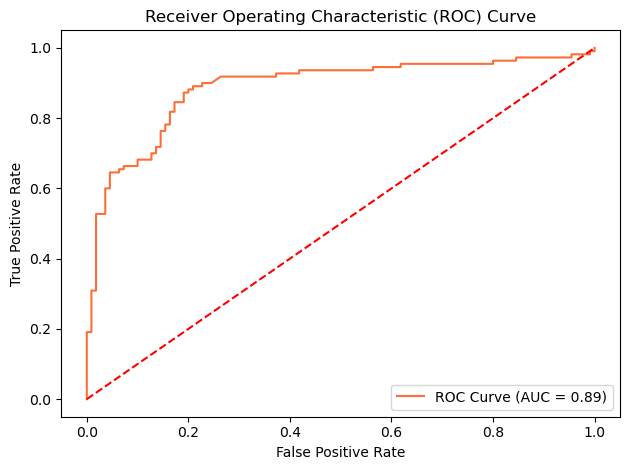

In [279]:
#ROC AUC Curve
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       110
           1       0.80      0.84      0.82       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

Cross-Validation Scores: [0.73743017 0.75842697 0.83707865 0.79775281 0.79775281]
Mean Cross-Validation Score: 0.7856882807105643


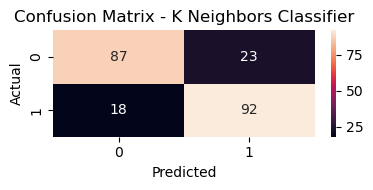

In [280]:
#K Neighbour Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8735123966942148


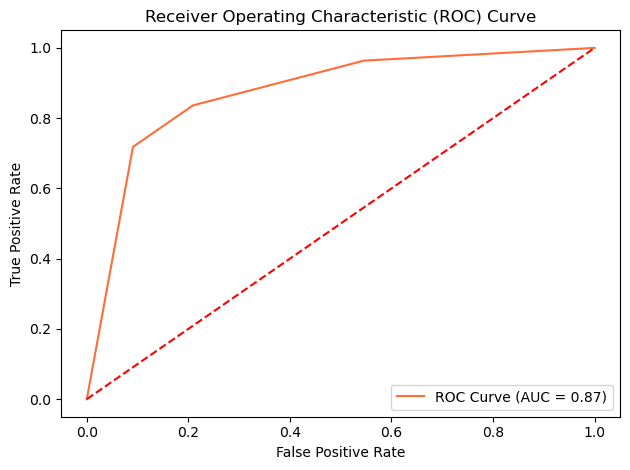

In [281]:
#ROC AUC Curve

y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       110
           1       0.82      0.75      0.79       110

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220

Cross-Validation Scores: [0.76536313 0.81460674 0.81460674 0.79775281 0.79775281]
Mean Cross-Validation Score: 0.7980164459230431


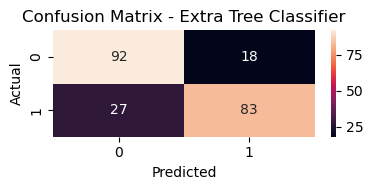

In [282]:
#Extra Tree Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8715289256198347


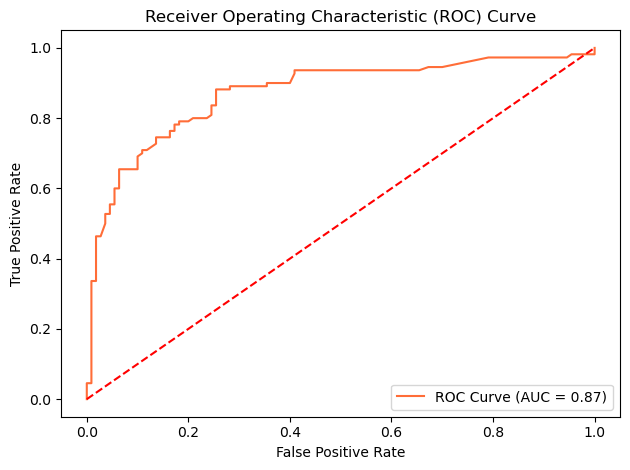

In [283]:
#ROC AUC Curve

y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.81      0.76      0.79       110

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220

Cross-Validation Scores: [0.81564246 0.80898876 0.81460674 0.80337079 0.85955056]
Mean Cross-Validation Score: 0.8204318624066286


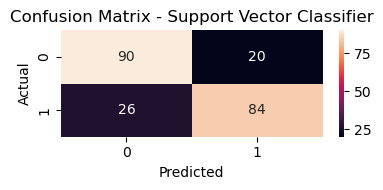

In [284]:
#Support Vector Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8597107438016529


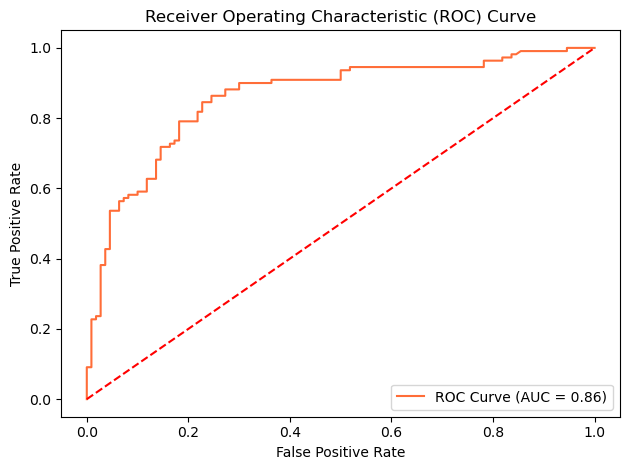

In [285]:
# ROC AUC curve

y_prob = best_SV.decision_function(X_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.84      0.80      0.82       110

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

Cross-Validation Scores: [0.85362319 0.82139037 0.9052139  0.87667112 0.90347028]
Mean Cross-Validation Score: 0.8720737745364673


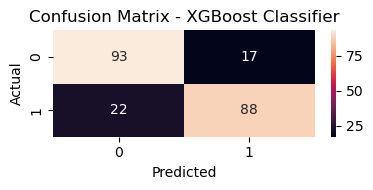

In [286]:
#XGBoost Classifier with Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)


print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.8882644628099173


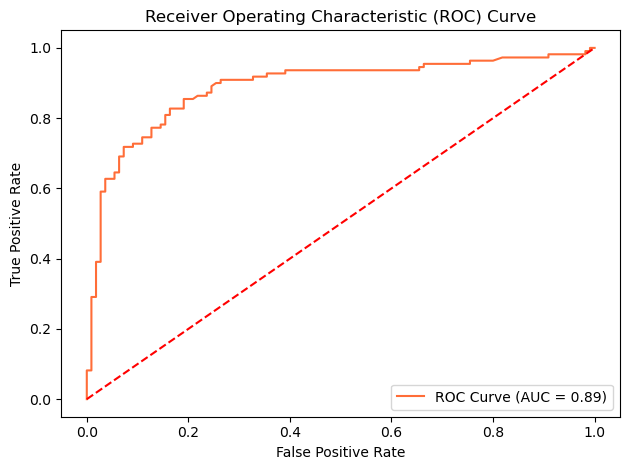

In [287]:
#ROC AUC Curve

y_prob = best_XGB.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [288]:
# Creating DataFrame of All the Models in Their descending Order

# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                  Model Name  Accuracy Score
1   Decision Tree Classifier        0.827273
2         XGBoost Classifier        0.822727
3     K Neighbour Classifier        0.813636
4   Random Forest Classifier        0.800000
5      Extra Tree Classifier        0.795455
6  Support Vector Classifier        0.790909
7        Logistic Regression        0.786364


In [289]:
#Save Best Model

import pickle
filename = 'RFClassifier.pkl'
pickle.dump(XGB, open(filename, 'wb'))